In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns

import utils as utl
from pathlib import Path

from scipy.ndimage import gaussian_filter1d

cfg = utl.load_config('./config.yml')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fly-centric cooridnate system

## example fly

In [51]:
# load HDF file
data = utl.load_data_hdf(cfg)

# tranform coordinates
df = data['P9LT'].groupby('flynum').get_group(1)
df = utl.transform_to_flycentric(df)

INFO: Fitted plane through ThC points
      a = -0.21, b = -9.32, c = 89.66, residual = 297.2
INFO: Constructing basis based on
      ThC plane a = -0.214 | b = -9.320 | c =  89.662
      notum x = -0.109 (0.001) | y = -0.682 (0.001) | z =  90.316 (0.003)
      R-WH  x =  0.187 (0.004) | y = -0.461 (0.002) | z =  89.957 (0.003)
      L-WH  x =  0.156 (0.001) | y = -0.479 (0.001) | z =  90.721 (0.002)
INFO: Transforming to fly-centric coordinates


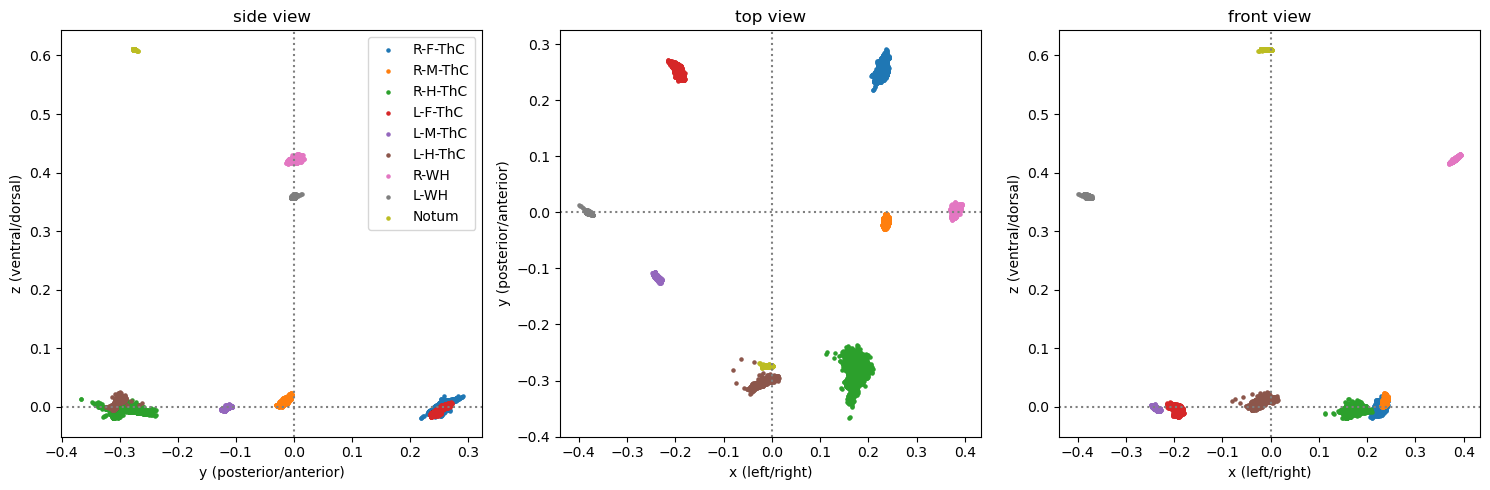

In [52]:
# plot ThC, Notum, WH
utl.plot_coord_system(df)

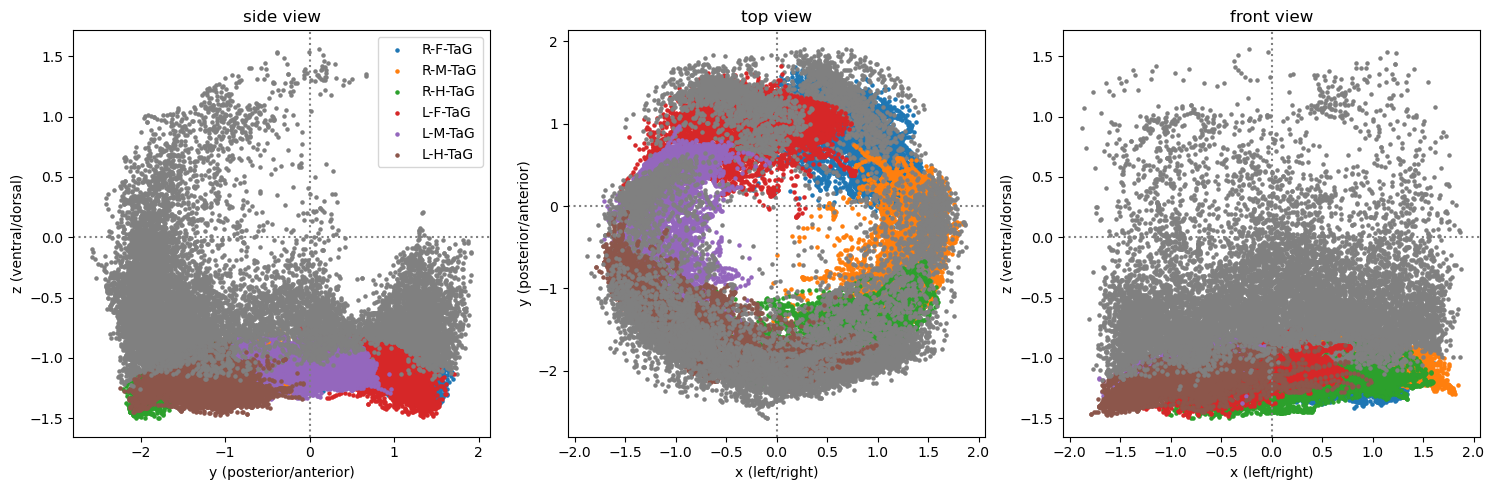

In [53]:
# plot TaG
utl.plot_coord_system(df, joints=['TaG'], swing_gray=True)

# batch pre-processing

## coordinate transformation

In [20]:
# load data
data = utl.load_data_hdf(cfg)

# calculate distance from ball center
ball_centers = utl.load_ball_centers(cfg)
utl.add_distance(data, ball_centers)

# cycle trough genotypes
for gen, df_gen in data.items():

    # cycle through flies
    for fly, df_fly in df_gen.groupby('flynum'):

        print('INFO: processing genotype {} | fly {}'.format(gen, fly))
        print('      ==================='.format(gen, fly))

        # convert to fly-centric coordinates
        df = utl.transform_to_flycentric(df_fly)
        data[gen].loc[df.index, :] = df




# store on disk
out_file = Path(cfg['data_folder']) / 'df_preproc.parquet'
utl.write_data_dict(data, out_file)

INFO: loading file data\Ballsystem_LegKinematics_DataStructures\P9_BPN\alldata_V6.h5
INFO: found genotype BPN
INFO: Renaming stepcycle columns
INFO: found genotype P9LT
INFO: Renaming stepcycle columns
INFO: found genotype P9RT
INFO: Renaming stepcycle columns
INFO: setting ball center for BPN from file BPN_V6_BallCenter.csv
      x = 0.145, y = 4.302, z = 98.967
INFO: setting ball center for P9RT from file P9RT_V6_BallCenter.csv
      x = -0.058, y = 4.081, z = 90.641
INFO: setting ball center for P9LT from file P9LT_V6_BallCenter.csv
      x = -0.036, y = 3.836, z = 90.634
INFO: Adding distance columns for BPN
INFO: Adding distance columns for P9RT
INFO: Adding distance columns for P9LT
INFO: processing genotype BPN | fly 1
INFO: Fitted plane through ThC points
      a = 0.29, b = -2.29, c = 98.92, residual = 122.4
INFO: Constructing basis based on
      ThC plane a =  0.293 | b = -2.293 | c =  98.920
      notum x =  0.084 (0.001) | y = -0.377 (0.001) | z =  98.264 (0.002)
      R-W

## plot coordinate system

In [22]:
# load preprocessed data from disk
out_file = Path(cfg['data_folder']) / 'df_preproc.parquet'
data = utl.load_data_dict(out_file)

# cycle trough genotypes
for gen, df_gen in data.items():

    dir_out = Path(cfg['plot_folder']) / 'fly_centric_coords/{}/'.format(gen)
    dir_out.mkdir(parents=True, exist_ok=True)

    # cycle through flies
    for fly, df_fly in df_gen.groupby('flynum'):
        utl.plot_coord_system(df_fly, path=dir_out / 'flynum_{}.png'.format(fly))


INFO: loading file data\df_preproc.parquet
